# Use Scikit-Learn’s data access interface to load digits data and take a look at this data. 

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

The images data is a three-dimensional array: 1,797 samples, each consisting of an 8×8 grid of pixels. Visualize the first hundred of these by running the code below.

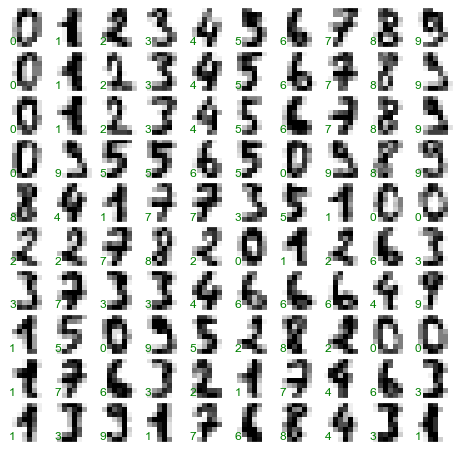

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
            subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
    transform=ax.transAxes, color='green')

In order to work with this data within Scikit-Learn, we need a two-dimensional, (n_samples, n_features) representation. We can accomplish this by treating each pixel in the image as a feature—that is, by flattening out the pixel arrays so that we have a length-64 array of pixel values representing each digit. Additionally, we need the target array, which gives the previously determined label for each digit. These two quantities are built into the digits dataset under the 'data' and 'target' attributes, respectively:

In [3]:
X = digits.data
X.shape

(1797, 64)

In [4]:
y = digits.target
y.shape

(1797,)

We see here that there are 1,797 samples and 64 features.

# Unsupervised learning: Dimensionality reduction

We can visualize the points within the 64-dimensional parameter space, but it’s difficult to effectively visualize points in such a high-dimensional space. Therefore we’ll reduce the dimensions to 2, using an unsupervised method. Here, we’ll make use of a manifold learning algorithm called Isomap and transform the data to two dimensions:

In [5]:
from sklearn.manifold import Isomap

iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

We see that the projected data is now two-dimensional. Plot this data to see if we can learn anything from its structure

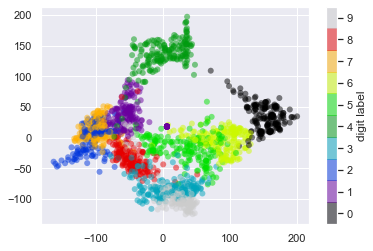

In [6]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

This plot gives us some good intuition into how well various numbers are separated in the larger 64-dimensional space. For example, zeros (in black) and ones (in purple) have very little overlap in parameter space. Intuitively, this makes sense: a zero is empty in the middle of the image, while a one will generally have ink in the middle. On the other hand, there seems to be a more or less continuous spectrum between ones and fours: we can understand this by realizing that some people draw ones with “hats” on them, which cause them to look similar to fours.

Overall, however, the different groups appear to be fairly well separated in the parameter
space: this tells us that even a very straightforward supervised classification algorithm
should perform suitably on this data.

#  Classification on Digits 

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

Now that we have predicted our model, we can gauge its accuracy by comparing the true values of the test set to the predictions:

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

With even this extremely simple model, we find about 80% accuracy for classification of the digits! However, this single number doesn’t tell us where we’ve gone wrong—
one nice way to do this is to use the confusion matrix, which we can compute with Scikit-Learn and plot with Seaborn

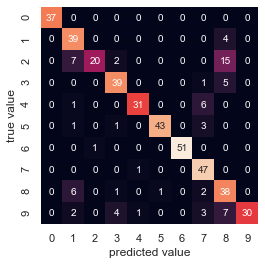

In [9]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

This shows us where the mislabeled points tend to be: for example, a large number of twos here are misclassified as either ones or eights. Another way to gain intuition into
the characteristics of the model is to plot the inputs again, with their predicted labels. We’ll use green for correct labels, and red for incorrect labels.

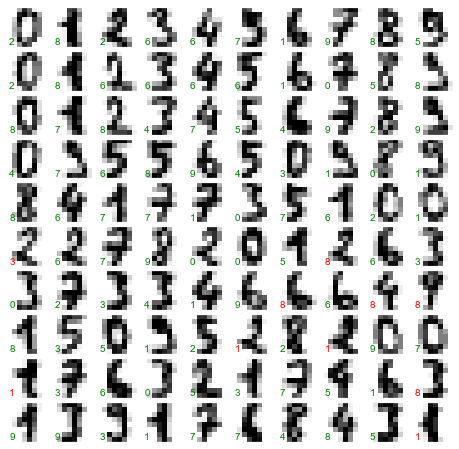

In [10]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
            subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
    transform=ax.transAxes,
    color='green' if (ytest[i] == y_model[i]) else 'red')